In [21]:
"""
https://stanfordnlp.github.io/stanfordnlp/index.html
Python3.6.6
stanfordnlp and pygraphviz avaliable via pip
If running for the first time uncomment last string for donwloading model
"""

import stanfordnlp
import pandas as pd
import pygraphviz as pgv
#stanfordnlp.download('ru') #if there's no model downloaded, specificate via interface and downloads it in ~/stanfordnlp_resources by default

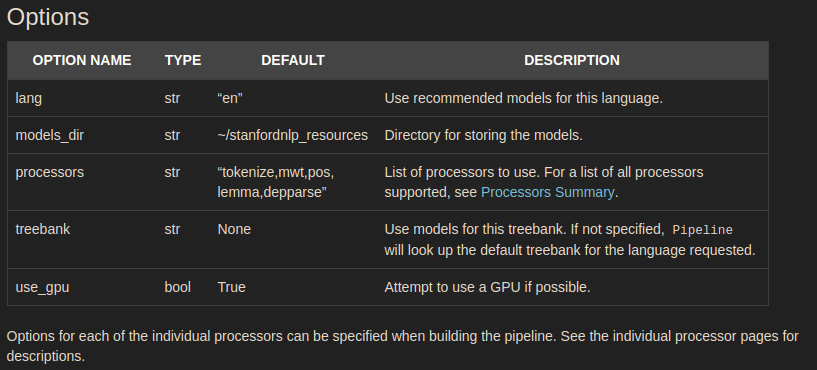

In [2]:
nlp = stanfordnlp.Pipeline(lang='ru')# Loads models in nlp, options from upside goes here. By default for 'ru'
                                      # used SynTagRus treebank pretrained pipeline.

def raw_conll_to_df(raw_conll):
"""
Translate raw conll string into pandas.DataFrame object.
"""
    s_data = pd.Series(raw_conll.split('\n'))
    data = s_data[:-2].str.split('\t', expand=True)
    data.columns = ['ID','FORM','LEMMA','UPOS','XPOS','FEATS','HEAD','DEPREL','DEPS','MISC']
    data = data.set_index('ID')
    return data

def df_to_graph(dataframe):
"""
Translate pandas.DataFrame into GraphViz structured graph.
Representation tested in https://dreampuf.github.io/GraphvizOnline
"""    
    #Work only for 1 sentence.
    G = pgv.AGraph(strict=False, directed=True)
    G.add_nodes_from(dataframe['FORM'].values)
    for index in dataframe.index:
        if dataframe['HEAD'][index] != 0:
            G.add_edge(dataframe['FORM'][int(dataframe['HEAD'][index])-1],dataframe['FORM'][index])
    return G



Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/home/burzilov/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_tokenizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/home/burzilov/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_tagger.pt', 'pretrain_path': '/home/burzilov/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/home/burzilov/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_lemmatizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/home/burzilov/stanfordnlp_resources/ru_syntagrus_models/ru_synt

In [14]:
input_raw_text = """Премьер-министр России Дмитрий Медведев поручил Генпрокуратуре, Следственному комитету и МВД проверить, есть ли связь между лесными пожарами в Сибири и незаконной вырубкой лесов."""
input_raw_text

Премьер-министр России Дмитрий Медведев поручил Генпрокуратуре, Следственному комитету и МВД проверить, есть ли связь между лесными пожарами в Сибири и незаконной вырубкой лесов.


In [15]:
result_object = nlp(input_raw_text) #Process raw input into inner object

In [16]:
conll_output = result_object.conll_file.conll_as_string() # return innner object with the whole processed text in ConLL-U format.

In [17]:
#Example of output viz.
conll_output

'1\tПремьер-министр\tпремьер-министр\tNOUN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Sing\t5\tnsubj\t_\t_\n2\tРоссии\tроссия\tPROPN\t_\tAnimacy=Inan|Case=Gen|Gender=Fem|Number=Sing\t1\tnmod\t_\t_\n3\tДмитрий\tдмитрий\tPROPN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Sing\t1\tappos\t_\t_\n4\tМедведев\tмедведев\tPROPN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Sing\t3\tflat:name\t_\t_\n5\tпоручил\tпоручить\tVERB\t_\tAspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\tГенпрокуратуре\tгенпрокуратура\tPROPN\t_\tAnimacy=Inan|Case=Dat|Gender=Fem|Number=Sing\t5\tiobj\t_\t_\n7\t,\t,\tPUNCT\t_\t_\t9\tpunct\t_\t_\n8\tСледственному\tследственный\tADJ\t_\tCase=Dat|Degree=Pos|Gender=Masc|Number=Sing\t9\tamod\t_\t_\n9\tкомитету\tкомитет\tNOUN\t_\tAnimacy=Inan|Case=Dat|Gender=Masc|Number=Sing\t6\tconj\t_\t_\n10\tи\tи\tCCONJ\t_\t_\t11\tcc\t_\t_\n11\tМВД\tмвд\tPROPN\t_\tAnimacy=Inan|Case=Dat|Gender=Neut|Number=Sing\t6\tconj\t_\t_\n12\tпроверить\tпрове

In [18]:
print(conll_output)

1	Премьер-министр	премьер-министр	NOUN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	5	nsubj	_	_
2	России	россия	PROPN	_	Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing	1	nmod	_	_
3	Дмитрий	дмитрий	PROPN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	1	appos	_	_
4	Медведев	медведев	PROPN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	3	flat:name	_	_
5	поручил	поручить	VERB	_	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	0	root	_	_
6	Генпрокуратуре	генпрокуратура	PROPN	_	Animacy=Inan|Case=Dat|Gender=Fem|Number=Sing	5	iobj	_	_
7	,	,	PUNCT	_	_	9	punct	_	_
8	Следственному	следственный	ADJ	_	Case=Dat|Degree=Pos|Gender=Masc|Number=Sing	9	amod	_	_
9	комитету	комитет	NOUN	_	Animacy=Inan|Case=Dat|Gender=Masc|Number=Sing	6	conj	_	_
10	и	и	CCONJ	_	_	11	cc	_	_
11	МВД	мвд	PROPN	_	Animacy=Inan|Case=Dat|Gender=Neut|Number=Sing	6	conj	_	_
12	проверить	проверить	VERB	_	Aspect=Perf|VerbForm=Inf|Voice=Act	5	xcomp	_	_
13	,	,	PUNCT	_	_	14	punct	_	_
14	есть	быть	VERB	_	Aspe

In [19]:
raw_conll_to_df(conll_output)

,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC
ID,,,,,,,,,
1,Премьер-министр,премьер-министр,NOUN,_,Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing,5,nsubj,_,_
2,России,россия,PROPN,_,Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing,1,nmod,_,_
3,Дмитрий,дмитрий,PROPN,_,Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing,1,appos,_,_
4,Медведев,медведев,PROPN,_,Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing,3,flat:name,_,_
5,поручил,поручить,VERB,_,Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|T...,0,root,_,_
6,Генпрокуратуре,генпрокуратура,PROPN,_,Animacy=Inan|Case=Dat|Gender=Fem|Number=Sing,5,iobj,_,_
7,",",",",PUNCT,_,_,9,punct,_,_
8,Следственному,следственный,ADJ,_,Case=Dat|Degree=Pos|Gender=Masc|Number=Sing,9,amod,_,_
9,комитету,комитет,NOUN,_,Animacy=Inan|Case=Dat|Gender=Masc|Number=Sing,6,conj,_,_


In [24]:
G = df_to_graph(raw_conll_to_df(conll_output))
print(G.string())

digraph "" {
	"Премьер-министр" -> России;
	"Премьер-министр" -> Дмитрий;
	Дмитрий -> Медведев;
	поручил -> "Премьер-министр";
	поручил -> Генпрокуратуре;
	поручил -> проверить;
	Генпрокуратуре -> комитету;
	Генпрокуратуре -> МВД;
	проверить -> есть;
	комитету -> ",";
	комитету -> Следственному;
	МВД -> и;
	есть -> ",";
	есть -> ли;
	есть -> связь;
	есть -> ".";
	связь -> пожарами;
	"." -> поручил;
	пожарами -> между;
	пожарами -> лесными;
	пожарами -> Сибири;
	пожарами -> вырубкой;
	Сибири -> в;
	вырубкой -> и;
	вырубкой -> незаконной;
	вырубкой -> лесов;
}



BY https://dreampuf.github.io/GraphvizOnline, граф немного смещенный в связи с неоднозначной идентефикацией токенов при записи в формат.
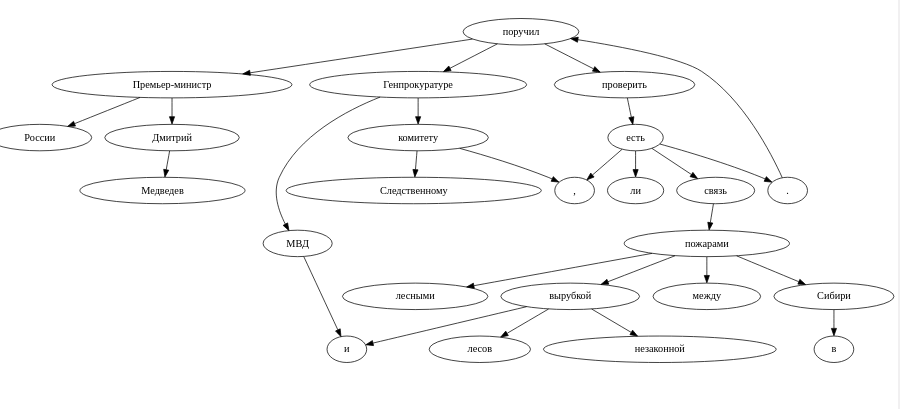

In [29]:
# Only POS
pos = stanfordnlp.Pipeline(lang='ru', processors='tokenize,pos')
doc = pos(input_raw_text)

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/home/burzilov/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_tokenizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/home/burzilov/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_tagger.pt', 'pretrain_path': '/home/burzilov/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
Done loading processors!
---


In [32]:
type(doc)

stanfordnlp.pipeline.doc.Document

In [35]:
doc.sentences[0].print_words()

<Word index=1;text=Премьер-министр;upos=NOUN;xpos=_;feats=Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing>
<Word index=2;text=России;upos=PROPN;xpos=_;feats=Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing>
<Word index=3;text=Дмитрий;upos=PROPN;xpos=_;feats=Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing>
<Word index=4;text=Медведев;upos=PROPN;xpos=_;feats=Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing>
<Word index=5;text=поручил;upos=VERB;xpos=_;feats=Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act>
<Word index=6;text=Генпрокуратуре;upos=PROPN;xpos=_;feats=Animacy=Inan|Case=Dat|Gender=Fem|Number=Sing>
<Word index=7;text=,;upos=PUNCT;xpos=_;feats=_>
<Word index=8;text=Следственному;upos=ADJ;xpos=_;feats=Case=Dat|Degree=Pos|Gender=Masc|Number=Sing>
<Word index=9;text=комитету;upos=NOUN;xpos=_;feats=Animacy=Inan|Case=Dat|Gender=Masc|Number=Sing>
<Word index=10;text=и;upos=CCONJ;xpos=_;feats=_>
<Word index=11;text=МВД;upos=PROPN;xpos=_;feats=Animacy=Inan|Case=Dat|Gen